# Bank Churn Data Set

In [ ]:
!pip3 install seaborn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [7]:
##The data set of an international bank was obtained from Kaggle  
##https://www.kaggle.com/nasirislamsujan/bank-customer-churn-prediction
file='./Churn_Modelling.csv'
df=pd.read_csv(file)

In [8]:
#Information about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
##First five rows and all columns
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
##Dropping RowNumber, CustomerId, and Surname columns. 
df.drop(["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
#Chechking NA values
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:
##Changing the name of Exited column as Churn 
df.loc[(df['Exited'] == 0), 'Churn'] = 'Non-Churn'
df.loc[(df['Exited'] == 1), 'Churn'] = 'Churn'
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Churn
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Non-Churn
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Churn
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Non-Churn
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Non-Churn


In [13]:
##Grouping ages to investigate age group effect on the churn decision 
## Student: under Age 25, Employee: Age 25- 64, Retired: Age 65 and older
df.loc[(df['Age'] < 25), 'AgeGroup'] = 'Under age 25'
df.loc[(df['Age'] >= 25) & (df['Age']<= 64), 'AgeGroup'] = 'Age 25-64'
df.loc[(df['Age'] >= 65), 'AgeGroup'] = 'Age 65 and older'
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Churn,AgeGroup
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Churn,Age 25-64
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Non-Churn,Age 25-64
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Churn,Age 25-64
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Non-Churn,Age 25-64
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Non-Churn,Age 25-64


<AxesSubplot:ylabel='Churn'>

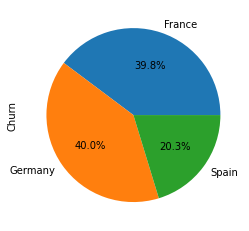

In [14]:
freq=pd.crosstab(df.Geography, df.Churn)
freq['Churn'].plot(kind='pie', autopct='%1.1f%%')

In [15]:
mask=(df.Churn=='Churn')
freq=pd.crosstab(df[mask].Geography, df[mask].NumOfProducts)
sns.heatmap(freq, cmap="YlGnBu", annot=True, cbar=True, fmt='d')
plt.title('Churned Customers',fontsize = 12, weight='bold')
plt.ylabel("")

NameError: name 'sns' is not defined

In [ ]:
freq=pd.crosstab(df.Gender, df.Churn)
freq['Churn'].plot(kind='pie', autopct='%1.1f%%')

In [ ]:
mask=(df.Churn=='Churn')
freq=pd.crosstab(df[mask].Geography, df[mask].Gender)
freq.plot(kind='bar')

In [ ]:
sns.heatmap(pd.crosstab(df.Tenure, df.Churn), cmap="YlGnBu", annot=True, cbar=True, fmt='d')

In [ ]:
sns.heatmap(pd.crosstab(df.NumOfProducts, df.Churn), cmap="YlGnBu", annot=True, cbar=True, fmt='g')

In [ ]:
freq=pd.crosstab(df.HasCrCard, df.Churn)
freq.plot(kind='bar')

In [ ]:
freq=pd.crosstab(df.IsActiveMember, df.Churn)
freq.plot(kind='bar')

In [ ]:
mask=(df.Churn=='Churn')
sns.violinplot(x="Tenure", y="CreditScore", data=df[mask])

In [ ]:
plt.figure(figsize=[8,10])
plt.subplot(3,1,1)
mask1=(df.Geography=='Germany')
sns.swarmplot(x="AgeGroup", y="CreditScore", hue="Churn", data=df[mask1], size=6, palette="Set2", dodge=True, 
              order=["Under age 25", "Age 25-64", "Age 65 and older"])
plt.xlabel("")
plt.ylabel('Credit Scores',fontsize = 11, style='italic', weight='bold')
plt.title('GERMANY',fontsize = 12, weight='bold')
plt.legend(['Non-Churn', 'Churn'], ncol=2, loc='lower right')
plt.xticks(size = 1)
plt.yticks(size = 1)

plt.subplot(3,1,2)
mask2=(df.Geography=='France')
sns.swarmplot(x="AgeGroup", y="CreditScore", hue="Churn", data=df[mask2], size=6, palette="Set2", dodge=True,
             order=["Under age 25", "Age 25-64", "Age 65 and older"])
plt.xlabel("")
plt.ylabel('Credit Scores',fontsize = 11, style='italic', weight='bold')
plt.title('FRANCE',fontsize = 12, weight='bold')
plt.legend(['Non-Churn', 'Churn'], ncol=2, loc='lower right')
plt.xticks(size = 1)
plt.yticks(size = 1)

plt.subplot(3,1,3)
mask3=(df.Geography=='Spain')
sns.swarmplot(x="AgeGroup", y="CreditScore", hue="Churn", data=df[mask3], size=6, palette="Set2", dodge=True,
              order=["Under age 25", "Age 25-64", "Age 65 and older"])
plt.ylabel('Credit Scores',fontsize = 11, style='italic', weight='bold')
plt.title('SPAIN',fontsize = 12, weight='bold')
plt.legend(['Non-Churn', 'Churn'], ncol=2, loc='lower right')
plt.xticks(size = 1)
plt.yticks(size = 1);
plt.plot()

In [ ]:
plt.figure(figsize=[8,10])
plt.subplot(3,1,1)
mask1=(df.Geography=='Germany')
sns.swarmplot(x="AgeGroup", y="Balance", hue="Churn", data=df[mask1], size=6, dodge=True,
             order=["Under age 25", "Age 25-64", "Age 65 and older"])
plt.xlabel("")
plt.ylabel('Balance',fontsize = 11, style='italic', weight='bold')
plt.title('GERMANY',fontsize = 12, weight='bold')
plt.legend(['Non-Churn', 'Churn'], ncol=2, loc='upper right')
plt.xticks(size = 1)
plt.yticks(size = 1)

plt.subplot(3,1,2)
mask2=(df.Geography=='France')
sns.swarmplot(x="AgeGroup", y="Balance", hue="Churn", data=df[mask2], size=6, dodge=True,
             order=["Under age 25", "Age 25-64", "Age 65 and older"])
plt.xlabel("")
plt.ylabel('Balance',fontsize = 11, style='italic', weight='bold')
plt.title('FRANCE',fontsize = 12, weight='bold')
plt.legend(['Non-Churn', 'Churn'], ncol=2, loc='upper right')
plt.xticks(size = 1)
plt.yticks(size = 1)

plt.subplot(3,1,3)
mask3=(df.Geography=='Spain')
sns.swarmplot(x="AgeGroup", y="Balance", hue="Churn", data=df[mask3], size=6, dodge=True,
             order=["Under age 25", "Age 25-64", "Age 65 and older"])
plt.xlabel("")
plt.ylabel('Balance',fontsize = 11, style='italic', weight='bold')
plt.title('SPAIN',fontsize = 12, weight='bold')
plt.legend(['Non-Churn', 'Churn'], ncol=2, loc='upper right')
plt.xticks(size = 1)
plt.yticks(size = 1)
plt.plot();

In [ ]:
plt.figure(figsize=[10,4])
mask=(df.HasCrCard==0) & (df.IsActiveMember==0)
sns.violinplot(x="NumOfProducts", y="Age", hue="Churn", data=df[mask], palette="Blues")
plt.xlabel("NumOfProducts")
plt.ylabel("Age")
plt.title('HasCreditCard=0 | IsActiveMember=0',fontsize = 12)
plt.xticks(size = 10)
plt.yticks(size = 10);

In [ ]:
plt.figure(figsize=[10,4])
mask=(df.HasCrCard==1) & (df.IsActiveMember==1)
sns.violinplot(x="NumOfProducts", y="Age", hue="Churn", data=df[mask], palette="Greens")
plt.xlabel("NumOfProducts")
plt.ylabel("Age")
plt.title('HasCreditCard=1 | IsActiveMember=1',fontsize = 12)
plt.xticks(size = 10)
plt.yticks(size = 10);